<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# <font color='white' size='20'>**Overview**</font>

<font color='white'>
Zacharia Schmitz

Joshua Click

<p style="font-size: 20px;"> Quality certification is a crucial step for both processes and is currently largely dependent on wine tasting by human experts. This work aims at the prediction of wine preferences from objective analytical tests. We'll do that by determining drivers of wine and build a model to be able to accuractely predict a wine's rating based on the finding we model. <p>

<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# <font color='white' size='20'><i>**Plan**</i></font> → Acquire → Prepare → Explore → Model → Deliver

---

<p style="font-size: 30px;">Background Information</p>

Find drivers of wine quality for the California Wine Institute.

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.

The classes are ordered and not balanced (e.g. there are munch more normal wines than
excellent or poor ones).

Outlier detection algorithms could be used to detect the few excellent
or poor wines. Also, we are not sure if all input variables are relevant. So
it could be interesting to test feature selection methods.

<p style="font-size: 30px;">Features we're exploring/testing</p>

`Volatile Acidity`:

- Definition: Volatile acidity refers to the presence of volatile acids, primarily acetic acid, in wine.

`Chlorides` (Chloride Content):

- Definition: Chlorides in wine refer to the concentration of chloride ions (Cl-) in the liquid.

`Density`:

- Definition: Density in wine refers to its mass per unit volume, typically measured in g/mL.

`Alcohol Content`:

- Definition: Alcohol content in wine is the percentage of alcohol by volume (ABV).

`Quality` **<i>(TARGET VARIABLE)</i>**:

- Definition: In this context, "quality" refers to a subjective rating or score assigned to a wine based on sensory evaluation and other factors.

### Check columns functions

<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# Plan → <font color='white' size='20'><i>**Acquire**</i></font> → Prepare → Explore → Model → Deliver

Data is collected from two csv files (red and white) and combined into one (wine).

**Red Wines:** 1,599 <br>
**White Wine:** 4,898 <br>

**Total:** 6,497

Original data is from: https://data.world/food/wine-quality

In [45]:
# Imports
import wrangle as w
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Load CSV
wine = w.load_wine_data()

<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# Plan → Acquire → <font color='white' size='20'><i>**Prepare**</i></font> → Explore → Model → Deliver

---

- Did not drop any nulls (there weren't any)

- No imputations performed (nothing to impute)

- Created `is_red` for if a wine is red (`1`) or white (`0`)

In [46]:
# Assign DF for stat testing
df = wine[["volatile_acidity", "chlorides", "density", "alcohol", "quality", "is_red"]]

In [47]:
# Univariate exploration (before split)
w.check_columns(df, graphs=False, reports=False)

Total rows: 6497
Total columns: 6


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,volatile_acidity,float64,187,0,0.0,"[0.7, 0.88, 0.76, 0.28, 0.66, 0.6, 0.65, 0.58,...","[0.08, 1.58, 0.3396659996921656]"
1,chlorides,float64,214,0,0.0,"[0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0.0...","[0.009, 0.611, 0.05603386178236109]"
2,density,float64,998,0,0.0,"[0.9978, 0.9968, 0.997, 0.998, 0.9964, 0.9946,...","[0.98711, 1.03898, 0.9946966338309989]"
3,alcohol,float64,111,0,0.0,"[9.4, 9.8, 10.0, 9.5, 10.5, 9.2, 9.9, 9.1, 9.3...","[8.0, 14.9, 10.491800831149453]"
4,quality,int64,7,0,0.0,"[5, 6, 7, 4, 8, 3, 9]","[3.0, 9.0, 5.818377712790519]"
5,is_red,int64,2,0,0.0,"[1, 0]","[0.0, 1.0, 0.2461135908881022]"


### Examine the Outliers

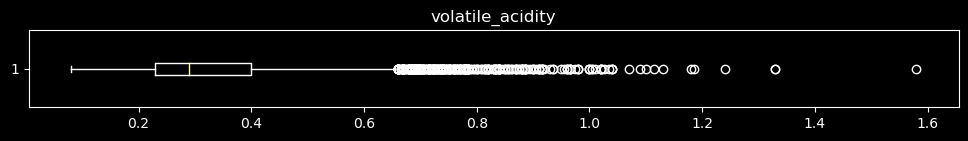

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 6120 (94.20%)
Number of results in upper quartile: 377 (5.80%)


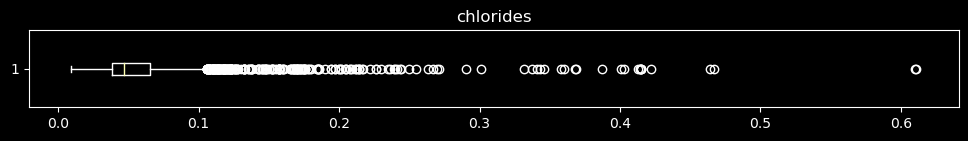

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 6211 (95.60%)
Number of results in upper quartile: 286 (4.40%)


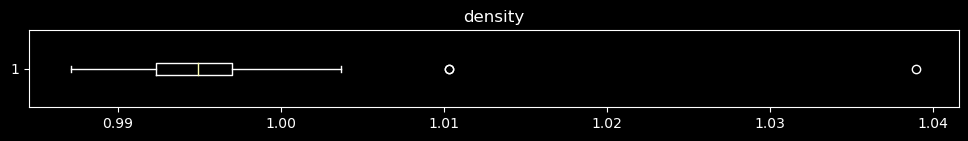

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 6494 (99.95%)
Number of results in upper quartile: 3 (0.05%)


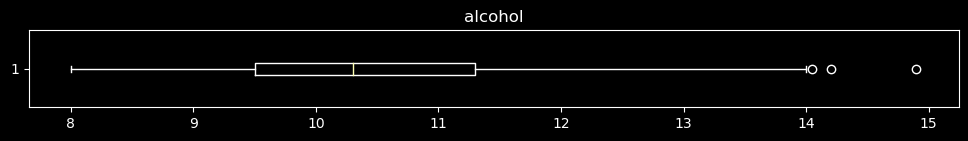

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 6494 (99.95%)
Number of results in upper quartile: 3 (0.05%)


In [48]:
# Run a function to plot the boxplot of all data determined columns, and visualize quartiles
w.box_plotter(df)

Due to some of these features having outliers, a standard or maybe robust scaler will most likely perform the best.

### Split Data Function

In [49]:
# Split for multivariate exploration

train, validate, test = w.split_data(df, random_state=123)

train: 3897 (60% of 6497)
validate: 1300 (20% of 6497)
test: 1300 (20% of 6497)


<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# Plan → Acquire → Prepare → <font color='white' size='20'><i>**Explore**</i></font> → Model → Deliver

### Normality?

- If Shapiro's P value > 0.05, data is normal<br>
- If Levene's P value > 0.05, data has equal variance

In [50]:
# Runs a shapiro's test for normality and a levene test for equal variance
w.test_normality_and_variance(train, target="quality")

volatile_acidity: Not normal
volatile_acidity: Not equal variance

chlorides: Not normal
chlorides: Not equal variance

density: Not normal
density: Not equal variance

alcohol: Not normal
alcohol: Not equal variance



### Graphs n' Stats

#### 1. For `volatile_acidity` vs. `quality`:

$H_0$: The mean volatile_acidity for all levels of quality is the same.

$H_a$: The mean volatile_acidity for at least one level of quality is different.

#### 2. For `chlorides` vs. `quality`:

$H_0$: The mean chlorides for all levels of quality is the same.

$H_a$: The mean chlorides for at least one level of quality is different.

#### 3. For `density` vs. `quality`:

$H_0$: The mean density for all levels of quality is the same.

$H_a$: The mean density for at least one level of quality is different.

#### 4. For `alcohol` vs. `quality`:

$H_0$: The mean alcohol content for all levels of quality is the same.

$H_a$: The mean alcohol content for at least one level of quality is different.

In [51]:
# Bin the quality into two seperate bins, upper and lower to compare two categories for testing
train["quality_binned"] = pd.cut(
    train["quality"], bins=[0, 6, 10], labels=["lower", "upper"]
)

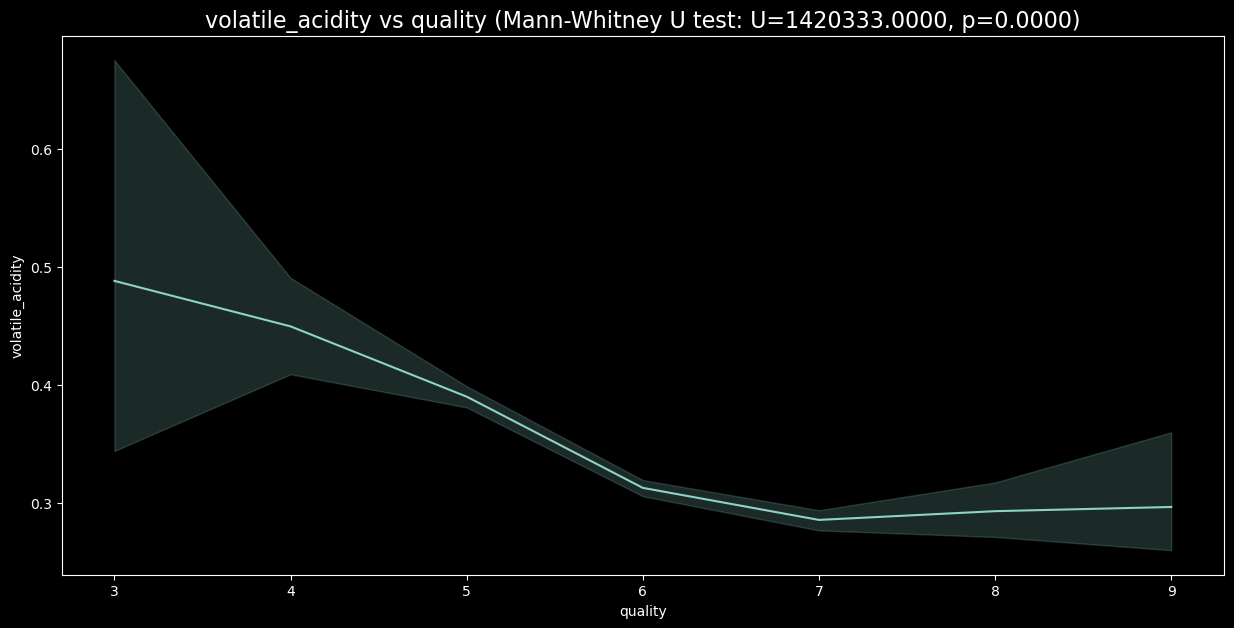

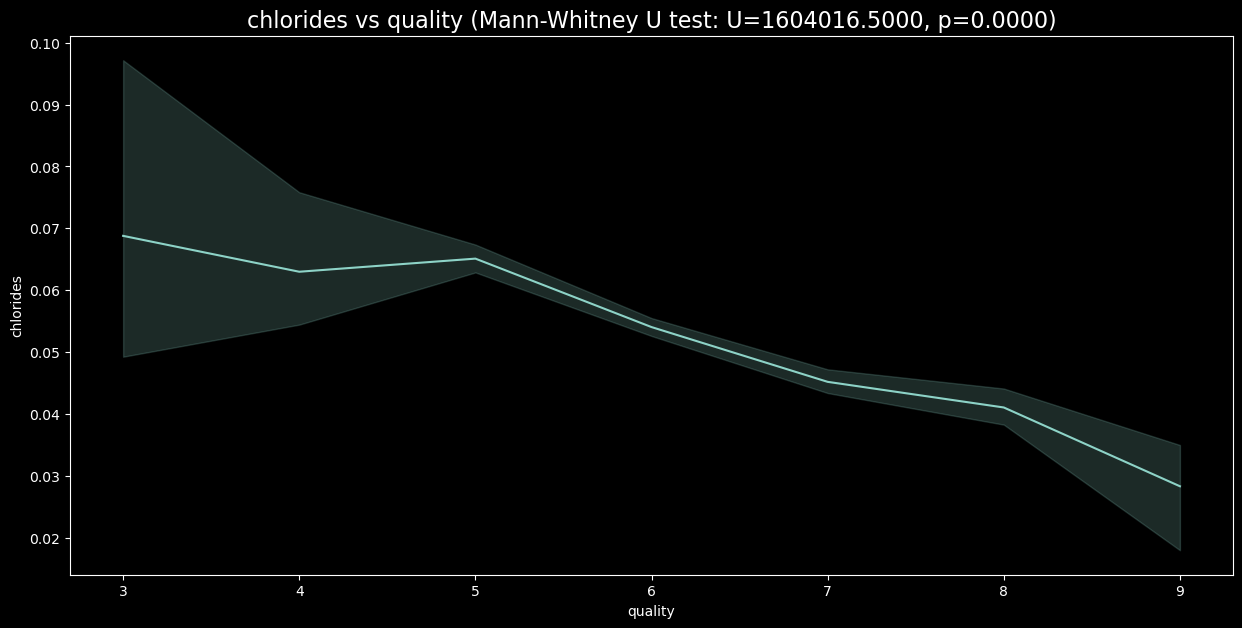

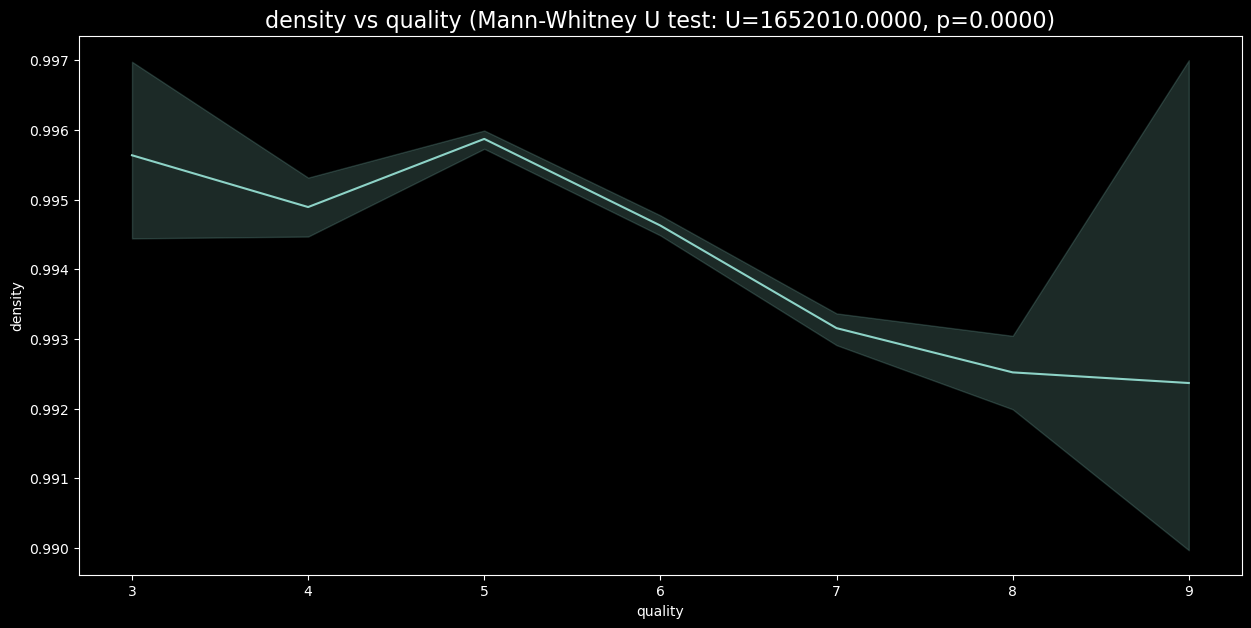

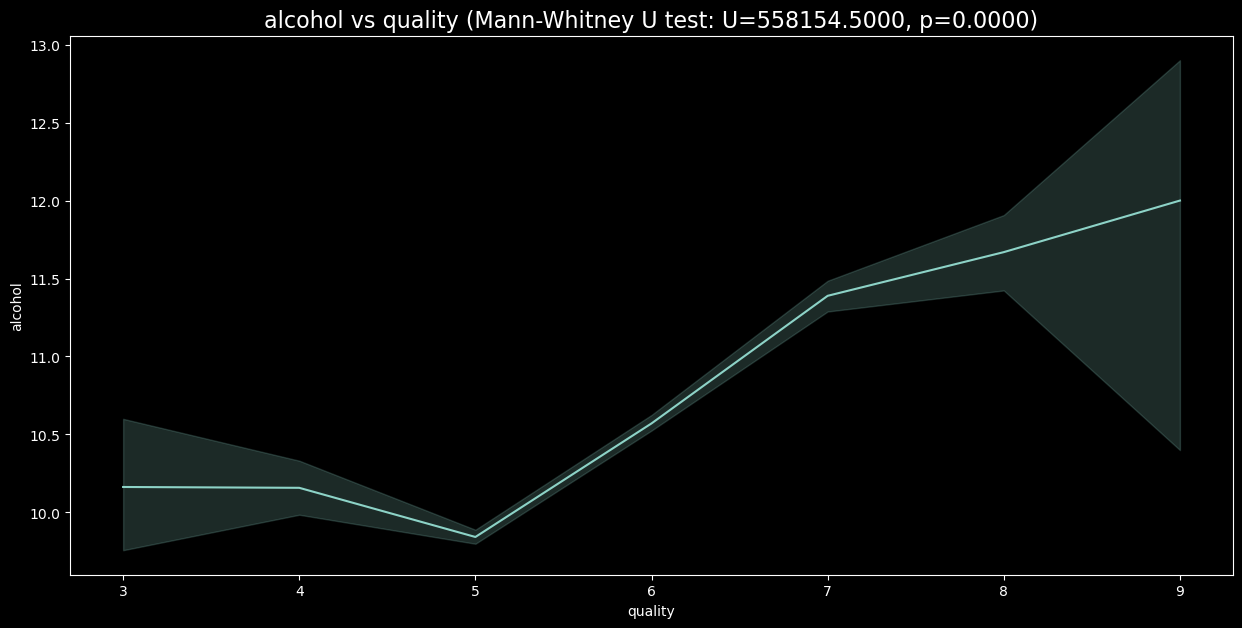

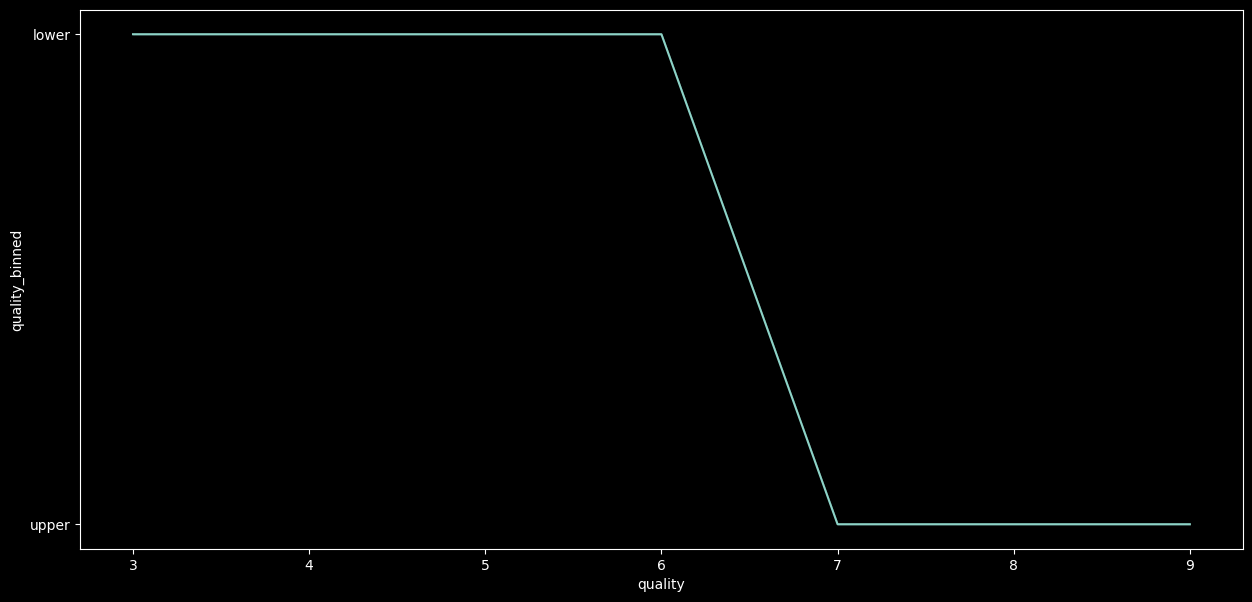

In [52]:
# Make a line plot for each column compared against quality
# Runs a Mann Whitney U for each comparison, and prints results in title

plot_quality_vs_feature(train, "quality")

**We reject the null hypotheses on all of these features.**

### Findings:

`volatile_acidity` vs. `quality`: 
- Acidity of the wine (volatile acidity) appears to be a significant factor influencing the quality rating. More acidity is considered lower quality.

`chlorides` vs. `quality`: 
- Chloride content in the wine is a significant factor in determining the quality rating. More chlorides appear to be lower quality.

`density` vs. `quality`: 
- Density is found to be a significant factor in assessing the quality of the wine. Wine snobs call this 'mouthfeel'. Higher density seems to lower the quality.

`alcohol` vs. `quality`: 
- Alcohol content is a significant factor influencing the quality rating of the wine. Higher alcohol seems to be desired.

### Split and Scale before KMeans

#### Split

In [53]:
# Drop the bin we made for statistic testing
train.drop(columns=["quality_binned"], inplace=True)

# We'll do exploration and train our model on the train data
X_train = train.drop(columns=["quality"])
y_train = train["quality"]

# We tune our model on validate, since it will be out-of-sample until we use it.
X_validate = validate.drop(columns=["quality"])
y_validate = validate["quality"]

# Keep the test separate, for our final out-of-sample dataset, to see how well our tuned model performs on new data.
X_test = test.drop(columns=["quality"])
y_test = test["quality"]

#### Baseline

In [54]:
# Calculates basline accuracy using mode (6)

w.calculate_baseline_accuracy(y_train, y_validate)

Baseline accuracy on validation set: 0.4277


### Scale

In [55]:
# Scale X sets using MinMax, fit on train and scale other sets

X_train_scaled, X_validate_scaled, X_test_scaled = w.mm_scale_data(
    X_train, X_validate, X_test
)

### K Means Elbow for Feature Engineering

The silhouette score from SKLearn is a metric used to evaluate the quality of clustering. It measures how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its own cluster and poorly-matched to neighboring clusters, and a score of -1 indicates the opposite.

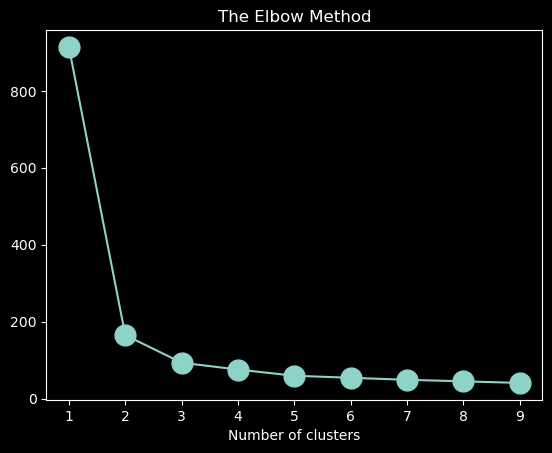

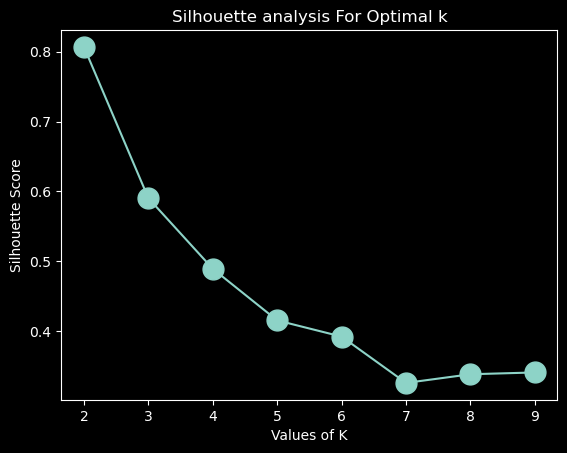

In [56]:
# Runs an elbow to determine best clusters and also a silhouette score to see the difference between the clusters
w.plot_elbow_and_silhouette(X_train_scaled)

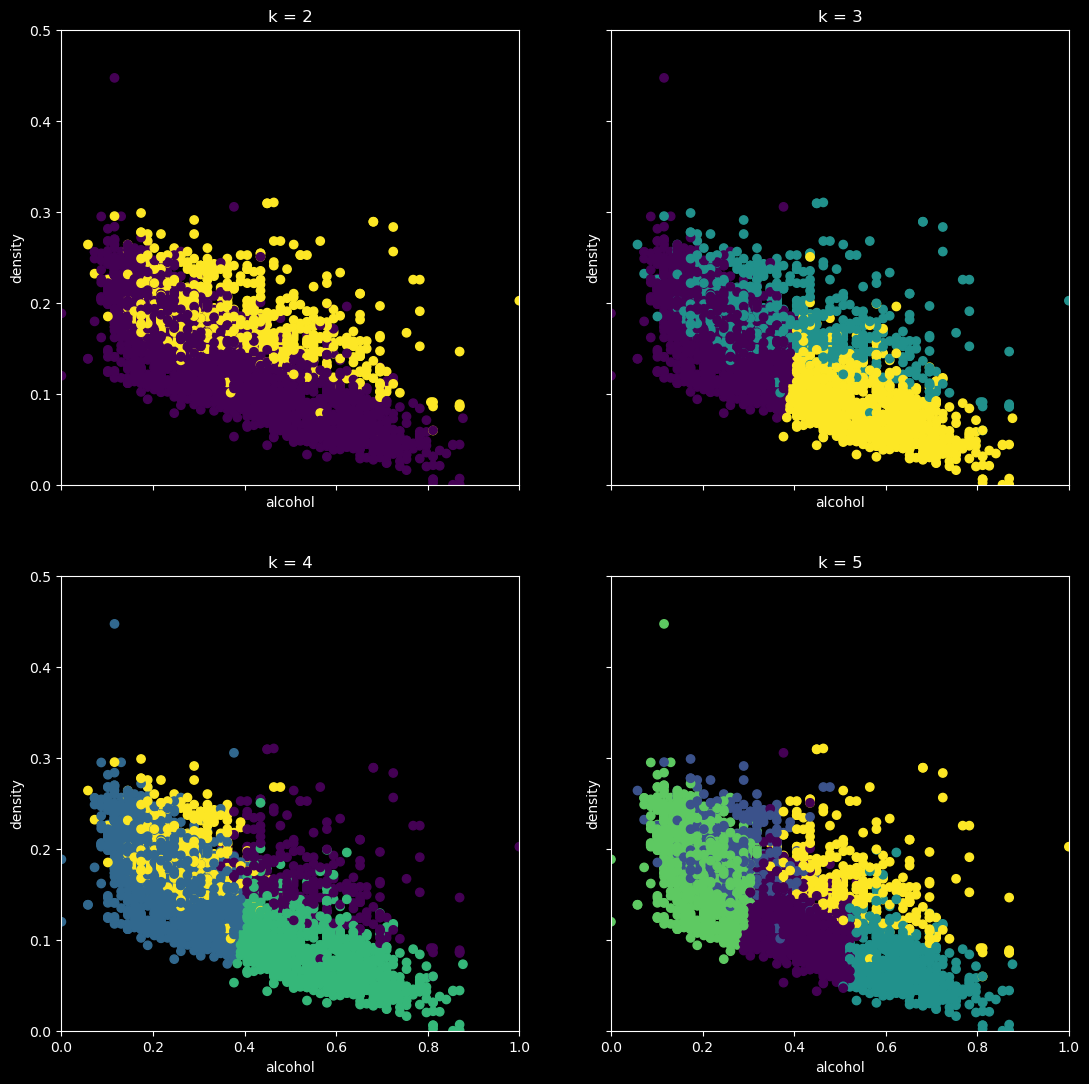

In [66]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

# Loop through each subplot and create a scatter plot with KMeans clustering
for ax, k in zip(axs.ravel(), range(2, 7)):
    # Fit KMeans clustering on the scaled training data and predict clusters
    clusters = KMeans(k).fit(X_train_scaled).predict(X_train_scaled)
    # Create a scatter plot with alcohol on the x-axis and density on the y-axis, colored by cluster
    ax.scatter(X_train_scaled[:, 3], X_train_scaled[:, 2], c=clusters)
    # Set the title of the subplot to the value of k
    ax.set(title="k = {}".format(k), xlabel="alcohol", ylabel="density")
    # Zoom in on the plots
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 0.5)

<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# Plan → Acquire → Prepare → Explore → <font color='white' size='20'><i>**Model**</i></font> → Deliver

- **Baseline predictions evaluated (2 pt)**

You made baseline predictions and evaluated the performance to measure your models against. Establishing a baseline prediction method that uses no features because it tells you if having a model has any value. If any model you build does not perform as well as a baseline that uses no features, then your features are not significant drivers of the outcome.

- **All models evaluated on train (2 pt)**

Models are always evaluated on train because it is a sample of data we have to see how the model performs. We should never skip straight to validate. We would be missing out on valuable observations.

- **Top models evaluated on validate (2 pt)**

Your top models are evaluated with the validate sample to check for overfitting.

**Eval metric(s) is clear and proper (2 pts)**

You identified what metric(s) you used to evaluate your models and why. If you considered multiple metrics, you explained how you selected a metric when one was better for model A and another is better for model B.

- **Final model evaluated on test (2 pts)**

Top model evaluated on test: we evaluate one last time on test in order to provide an estimate as to how we expect the model to perform in the future, in production, on data it has never seen.

- **Developed 4+ Unique Models (3 pts)**

You developed at least 4 unique models. Models can be different based on the features used, the hyperparameters selected, and/or the algorithm used to fit the data

---

### Model Loops

### Hyperparamter Tuning

- Take in a list of scalers to test
- Take in a number of clusters to test
- Cycles through the following hyperparameters:

```python
'n_estimators' = [100, 200, 300]
'max_depth' = [3, 6, 10]
'min_samples_split' = [2, 5, 10]
'min_samples_leaf' = [1, 2, 4]
```

**Returns a dataframe with the train and validate results of all the models that we concat for full evaluation**

In [11]:
# All scalers, 2 clusters
rfc_scores_robust_2 = w.hyper_tuning(
    X_train, y_train, X_validate, y_validate, scaler_name="robust", n_clusters=2
)
rfc_scores_mm_2 = w.hyper_tuning(
    X_train, y_train, X_validate, y_validate, scaler_name="minmax", n_clusters=2
)
rfc_scores_standard_2 = w.hyper_tuning(
    X_train, y_train, X_validate, y_validate, scaler_name="standard", n_clusters=2
)

In [ ]:
# All scalers, 3 clusters
rfc_scores_robust_3 = w.hyper_tuning(
    X_train, y_train, X_validate, y_validate, scaler_name="robust", n_clusters=3
)
rfc_scores_mm_3 = w.hyper_tuning(
    X_train, y_train, X_validate, y_validate, scaler_name="minmax", n_clusters=3
)
rfc_scores_standard_3 = w.hyper_tuning(
    X_train, y_train, X_validate, y_validate, scaler_name="standard", n_clusters=3
)

In [ ]:
# All scalers, 4 clusters
rfc_scores_robust_4 = w.hyper_tuning(
    X_train, y_train, X_validate, y_validate, scaler_name="robust", n_clusters=4
)
rfc_scores_mm_4 = w.hyper_tuning(
    X_train, y_train, X_validate, y_validate, scaler_name="minmax", n_clusters=4
)
rfc_scores_standard_4 = w.hyper_tuning(
    X_train, y_train, X_validate, y_validate, scaler_name="standard", n_clusters=4
)

In [ ]:
# All scalers, 5 clusters
rfc_scores_robust_5 = w.hyper_tuning(
    X_train, y_train, X_validate, y_validate, scaler_name="robust", n_clusters=5
)
rfc_scores_mm_5 = w.hyper_tuning(
    X_train, y_train, X_validate, y_validate, scaler_name="minmax", n_clusters=5
)
rfc_scores_standard_5 = w.hyper_tuning(
    X_train, y_train, X_validate, y_validate, scaler_name="standard", n_clusters=5
)

In [12]:
# Concat all 3 dataframes
rfc_scores = pd.concat(
    [
        rfc_scores_robust_2,
        rfc_scores_mm_2,
        rfc_scores_standard_2,
        rfc_scores_robust_3,
        rfc_scores_mm_3,
        rfc_scores_standard_3,
        rfc_scores_robust_4,
        rfc_scores_mm_4,
        rfc_scores_robust_5,
        rfc_scores_mm_5,
        rfc_scores_standard_5,
    ]
)

# Round acc_vall to 3 decimals
rfc_scores["acc_val"] = [round(float(x), 3) for x in rfc_scores["acc_val"]]
rfc_scores["acc_train"] = [round(float(x), 3) for x in rfc_scores["acc_train"]]
rfc_scores["acc_diff"] = [round(float(x), 3) for x in rfc_scores["acc_diff"]]

# Make a new df with only accuracy differences less than 0.1
rfc_scores_01 = rfc_scores[rfc_scores["acc_diff"] <= 0.1]

# Sort by highest accuracy on validate
rfc_scores_01.sort_values("acc_val", ascending=False)

,acc_train,acc_val,acc_diff,scaler,clusters,prec_train,prec_val,recall_train,recall_val,f1_train,f1_val,supp_train,supp_val
Hyperparameters,,,,,,,,,,,,,
"(300, 6, 10, 4)",0.601,0.555,0.046,standard,3,0.57864,0.517062,0.600975,0.554615,0.566998,0.516525,3897,1300
"(200, 6, 5, 1)",0.604,0.555,0.049,minmax,2,0.61146,0.517687,0.603541,0.554615,0.570891,0.517243,3897,1300
"(300, 6, 2, 1)",0.609,0.555,0.054,standard,5,0.644209,0.518776,0.608673,0.554615,0.578573,0.519075,3897,1300
"(300, 6, 5, 1)",0.604,0.555,0.048,standard,3,0.639534,0.516475,0.603541,0.555385,0.570549,0.517702,3897,1300
"(300, 6, 5, 2)",0.605,0.554,0.051,standard,3,0.610853,0.51482,0.604568,0.553846,0.571389,0.516214,3897,1300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(200, 3, 2, 1)",0.545,0.528,0.018,robust,2,0.523013,0.496554,0.545291,0.527692,0.493823,0.47459,3897,1300
"(100, 3, 10, 2)",0.545,0.528,0.017,robust,5,0.515047,0.493554,0.545035,0.528462,0.499166,0.485057,3897,1300
"(100, 3, 10, 2)",0.542,0.528,0.015,standard,2,0.521387,0.491797,0.542469,0.527692,0.490667,0.473965,3897,1300


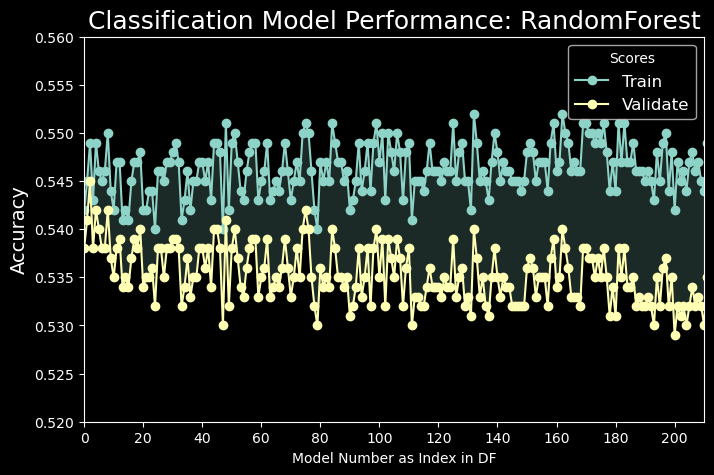

In [13]:
# Plot the model performance by accuracy score, and then the order it was modeled
w.plot_rfc_scores(rfc_scores_01)

As the ran through more hyperparamters, the train score went up, causing it to be overfit

### Test Model

Best model was:

- Total of 3 clusters
- Scaled with `StandardScaler`

```python
    n_estimators=100,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=2,
```

We then fit on train, and then predicted on test set

In [16]:
# Runs the best determined model using the scaler that was determined to be the best.
# The hyperparameters are hardcoded into the function.
w.cluster_and_model_test(
    X_train, y_train, X_test, y_test, scaler="standard", n_clusters=4, model="rfc"
)

,acc_train,acc_test,scaler,clusters,prec_train,prec_test,recall_train,recall_test,f1_train,f1_test,supp_train,supp_test,acc_validate
Model,,,,,,,,,,,,,
"RandomForestClassifier(max_depth=6, min_samples_leaf=2)",0.60893,0.562308,standard,4,0.613895,0.52917,0.60893,0.562308,0.578151,0.519965,3897,1300,NaN
Baseline,0.33282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.33282


<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# Plan → Acquire → Prepare → Explore → Model → <font color='white' size='20'><i>**Deliver**</i></font>

### **Takeaways and Key Findings**

### **Model Takeaways:**

- RandomForest was the best at very surface level tuning
- It became overfit with more hyperparameters
- Even with only 5 features (and 4 clusters), it performed very well

<br>

- **We positively identified some drivers of `quality` to be:**

    - `volatile_acidity`
    - `chlorides`
    - `density`
    - `alcohol`

<br>

- **With only these features, we found that 4 clusters performed the best**

- **Given that this model performed well (56%) on our test set, we would expect it to also perform well on unseen data**

### **Recommendations**

- Continue to run feature engineering and potentially test other models with other hyperparameters

- Possibly create models for red wine and white wine separately for better accuracy

### **Next Steps**

- Given more time we could check what is causing white wines to be rated lower

- Also with more time, we could run more hyperparamter and feature tuning to potentially get the models over 56% accuracy